# Lab9 - Spatial Data Analysis
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Import initial libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt

## Working with Shape File

### Loading Census Tract Shape File¶

In [3]:
from geopandas import GeoDataFrame

ImportError: dlopen(/Users/adrianoyoshino/anaconda/lib/python3.5/site-packages/fiona/ogrext.cpython-35m-darwin.so, 2): Library not loaded: @rpath/libnetcdf.11.dylib
  Referenced from: /Users/adrianoyoshino/anaconda/lib/libgdal.20.dylib
  Reason: Incompatible library version: libgdal.20.dylib requires version 12.0.0 or later, but libnetcdf.11.dylib provides version 11.0.0

In [2]:
from geopandas import GeoDataFrame
shape_path="Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

ImportError: dlopen(/Users/adrianoyoshino/anaconda/lib/python3.5/site-packages/fiona/ogrext.cpython-35m-darwin.so, 2): Library not loaded: @rpath/libnetcdf.11.dylib
  Referenced from: /Users/adrianoyoshino/anaconda/lib/libgdal.20.dylib
  Reason: Incompatible library version: libgdal.20.dylib requires version 12.0.0 or later, but libnetcdf.11.dylib provides version 11.0.0

In [39]:
ct_shape.head(50)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
BoroCT2010,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,..."
5006400,5006400,5,Staten Island,I,006400,64,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,7.643184e+06,12726.360406,POLYGON ((-74.07643744511992 40.60100160655585...
5007400,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948475,POLYGON ((-74.05974734759452 40.59384861156719...
5018701,5018701,5,Staten Island,I,018701,187.01,SI07,Westerleigh,3903,4.267476e+06,8626.771269,POLYGON ((-74.12135179626247 40.60976526815898...
1002202,1002202,1,Manhattan,I,002202,22.02,MN28,Lower East Side,3809,6.039223e+05,3817.391631,POLYGON ((-73.97823073299477 40.72067428669261...


In [19]:
print(ct_shape['BoroCT2010'].max())
print(ct_shape['BoroCT2010'].min())

5990100
1000100


In [23]:
copy = ct_shape.copy()

In [27]:
trial = copy.iloc[0:50]

In [40]:
trial

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
BoroCT2010,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,..."
5006400,5006400,5,Staten Island,I,006400,64,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,7.643184e+06,12726.360406,POLYGON ((-74.07643744511992 40.60100160655585...
5007400,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948475,POLYGON ((-74.05974734759452 40.59384861156719...
5018701,5018701,5,Staten Island,I,018701,187.01,SI07,Westerleigh,3903,4.267476e+06,8626.771269,POLYGON ((-74.12135179626247 40.60976526815898...
1002202,1002202,1,Manhattan,I,002202,22.02,MN28,Lower East Side,3809,6.039223e+05,3817.391631,POLYGON ((-73.97823073299477 40.72067428669261...


In [50]:
pd.to_numeric(trial['BoroCT2010'][0]) > 10500000000000

False

In [61]:
altitude = []
for i in range(0, len(copy)):
    if pd.to_numeric(copy['BoroCT2010'][i]) < 2520101:
        altitude.append(1.5)
    if pd.to_numeric(copy['BoroCT2010'][i]) > 2520102:
        altitude.append(2.5)

altitude

[2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5

In [62]:
copy['altitude'] = altitude
copy.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,altitude
BoroCT2010,,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...,2.5
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...,2.5
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...,2.5
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...,2.5
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,...",2.5


### Coordinate systems, projections, and transformations 

In [63]:
from fiona.crs import from_epsg
copy.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=copy.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

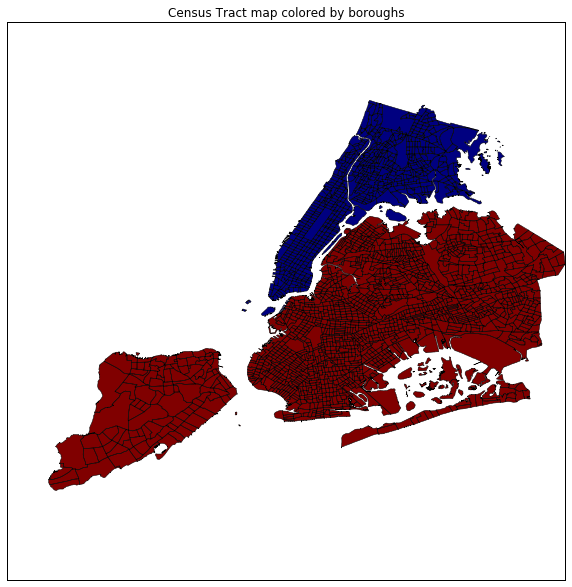

In [76]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
colors = {1.5:001, 2.5:101}
copy.plot(column='altitude',alpha=1,linewidth=0.5,ax=ax, c=colors)

plt.title("Census Tract map colored by boroughs")

In [78]:
from geopandas import GeoDataFrame
shape_path="Export_Output.shp"
export = GeoDataFrame.from_file(shape_path)
export.index=ct_shape.BoroCT2010

In [81]:
export.head(10)

,Avg_elevat,Avg_feat_c,Avg_source,Avg_sub_co,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,...,FID_1,NTACode,NTAName,OBJECTID,PUMA,Shape_Area,Shape_Le_1,Shape_Leng,avgElv,geometry
BoroCT2010,,,,,,,,,,,,,,,,,,,,,
5000900,159.911410,3015.779093,1.630166e+10,301577.909270,5000900,5,Staten Island,I,000900,9,...,0,SI22,West New Brighton-New Brighton-St. George,1,3903,2.497010e+06,7729.016794,7729.016794,0.0,"POLYGON ((962269.1260375977 173705.5001831204,..."
5012500,42.942238,3014.747814,1.640103e+10,301474.821789,5007400,5,Staten Island,I,007400,74,...,1,SI14,Grasmere-Arrochar-Ft. Wadsworth,2,3902,5.788238e+06,9902.948473,9902.948473,0.0,"POLYGON ((967656.8290405422 155637.1314087063,..."
5013301,91.958255,3016.938776,1.230172e+10,301693.877551,1009800,1,Manhattan,I,009800,98,...,2,MN19,Turtle Bay-East Midtown,3,3808,1.906016e+06,5534.199811,5534.199811,0.0,"POLYGON ((994133.507019043 214848.8975830227, ..."
5019700,135.960646,3009.944134,1.230102e+10,300994.413408,1010000,1,Manhattan,I,010000,100,...,3,MN19,Turtle Bay-East Midtown,4,3808,1.860938e+06,5692.168737,5692.168737,0.0,"POLYGON ((993108.3057861477 216013.1307983398,..."
5002002,180.340994,3011.027027,1.230113e+10,301102.702703,1010200,1,Manhattan,I,010200,102,...,4,MN17,Midtown-Midtown South,5,3807,1.860993e+06,5687.802439,5687.802439,0.0,"POLYGON ((992216.5391845852 216507.6870117188,..."
5006400,170.571064,3013.053892,1.230133e+10,301305.389222,1010400,1,Manhattan,I,010400,104,...,5,MN17,Midtown-Midtown South,6,3807,1.864600e+06,5693.036367,5693.036367,0.0,"POLYGON ((991325.8815917969 217001.6885986328,..."
5007400,164.873265,3011.567568,1.230118e+10,301156.756757,1011300,1,Manhattan,I,011300,113,...,6,MN17,Midtown-Midtown South,7,3807,1.890907e+06,5699.860641,5699.860641,0.0,"POLYGON ((988650.276611343 214286.4022216946, ..."
5018701,107.936242,3015.126050,1.230154e+10,301512.605042,1011402,1,Manhattan,I,011402,114.02,...,7,MN40,Upper East Side-Carnegie Hill,8,3805,1.063547e+06,4125.256029,4125.256029,0.0,"POLYGON ((994013.2479858398 217645.299621582, ..."
1002202,137.248799,3015.440729,1.326812e+10,301544.072948,1013000,1,Manhattan,I,013000,130,...,8,MN40,Upper East Side-Carnegie Hill,9,3805,1.918145e+06,5807.972956,5807.972956,0.0,"POLYGON ((994920.1096191406 221386.2695923001,..."


In [90]:
print(export['Avg_elevat'].max())
print(export['Avg_elevat'].min())

346.603656994
0.0


In [82]:
from fiona.crs import from_epsg
export.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=export.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: nan (mi^2)


In [84]:
export.columns

Index([u'Avg_elevat', u'Avg_feat_c', u'Avg_source', u'Avg_sub_co',
       u'BoroCT2010',   u'BoroCode',   u'BoroName', u'CDEligibil',
           u'CT2010',    u'CTLabel',     u'Count_',      u'FID_1',
          u'NTACode',    u'NTAName',   u'OBJECTID',       u'PUMA',
       u'Shape_Area', u'Shape_Le_1', u'Shape_Leng',     u'avgElv',
         u'geometry'],
      dtype='object')

In [122]:
def drown(level):
    altitude = []
    for i in range(0, len(export)):
        if pd.to_numeric(export['Avg_elevat'][i]) <= level:
            altitude.append(1)
        if pd.to_numeric(export['Avg_elevat'][i]) > level:
            altitude.append(2)
    
    export['altitude'] = altitude
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #colors = {1.5:001, 2.5:101}
    export.plot(column='altitude',alpha=1,linewidth=0.5,ax=ax)

    plt.title("Drowned Census Tracts on a sea water level increase of %d ft" %(level), fontsize = 15)

    #altitude

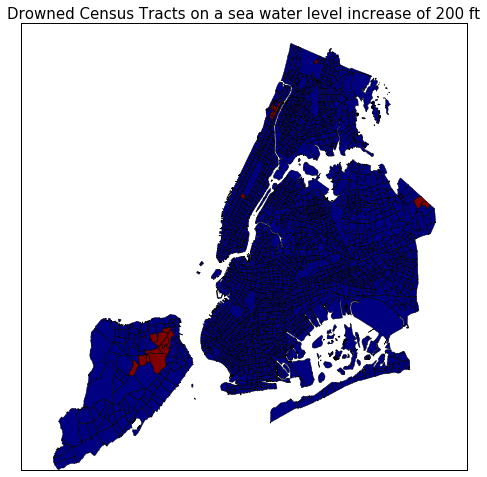

In [139]:
drown(200)

In [101]:
export['altitude'] = altitude
export.head()

,Avg_elevat,Avg_feat_c,Avg_source,Avg_sub_co,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,...,NTACode,NTAName,OBJECTID,PUMA,Shape_Area,Shape_Le_1,Shape_Leng,avgElv,geometry,altitude
BoroCT2010,,,,,,,,,,,,,,,,,,,,,
5000900,159.911410,3015.779093,1.630166e+10,301577.909270,5000900,5,Staten Island,I,000900,9,...,SI22,West New Brighton-New Brighton-St. George,1,3903,2.497010e+06,7729.016794,7729.016794,0.0,"POLYGON ((962269.1260375977 173705.5001831204,...",2
5012500,42.942238,3014.747814,1.640103e+10,301474.821789,5007400,5,Staten Island,I,007400,74,...,SI14,Grasmere-Arrochar-Ft. Wadsworth,2,3902,5.788238e+06,9902.948473,9902.948473,0.0,"POLYGON ((967656.8290405422 155637.1314087063,...",2
5013301,91.958255,3016.938776,1.230172e+10,301693.877551,1009800,1,Manhattan,I,009800,98,...,MN19,Turtle Bay-East Midtown,3,3808,1.906016e+06,5534.199811,5534.199811,0.0,"POLYGON ((994133.507019043 214848.8975830227, ...",2
5019700,135.960646,3009.944134,1.230102e+10,300994.413408,1010000,1,Manhattan,I,010000,100,...,MN19,Turtle Bay-East Midtown,4,3808,1.860938e+06,5692.168737,5692.168737,0.0,"POLYGON ((993108.3057861477 216013.1307983398,...",2
5002002,180.340994,3011.027027,1.230113e+10,301102.702703,1010200,1,Manhattan,I,010200,102,...,MN17,Midtown-Midtown South,5,3807,1.860993e+06,5687.802439,5687.802439,0.0,"POLYGON ((992216.5391845852 216507.6870117188,...",2


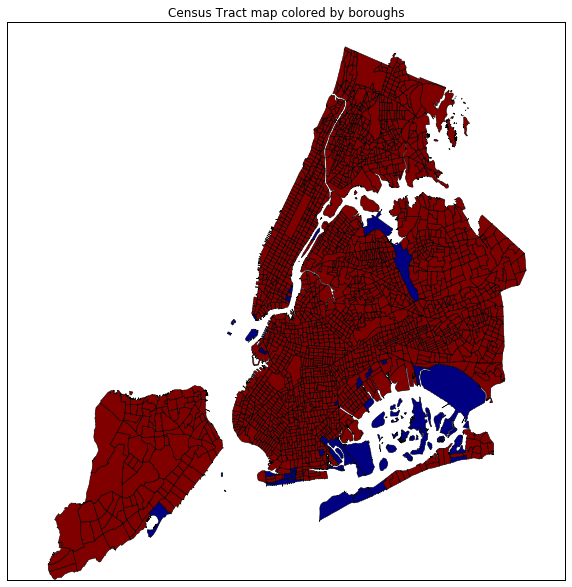

In [102]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#colors = {1.5:001, 2.5:101}
export.plot(column='altitude',alpha=1,linewidth=0.5,ax=ax)

plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [7]:
ct_data=DataFrame.from_csv('Data/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [8]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

#### Vusualize the Population density for 2010

/opt/rh/anaconda/root/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


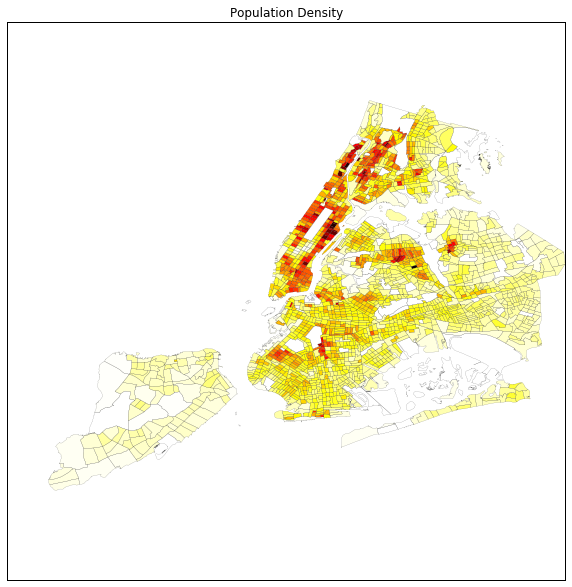

In [9]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [9]:
df_bike_monthly=DataFrame.from_csv('Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


### Time Series Aanalysis

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

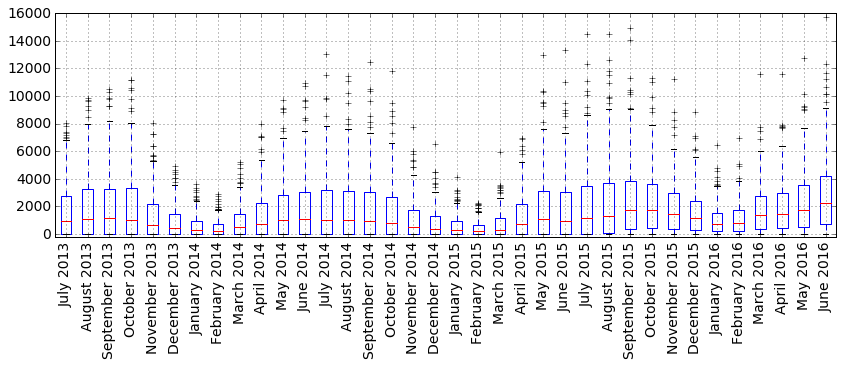

In [10]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=df_bike_monthly.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

#### Seasonal Decomposition

/opt/rh/anaconda/root/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


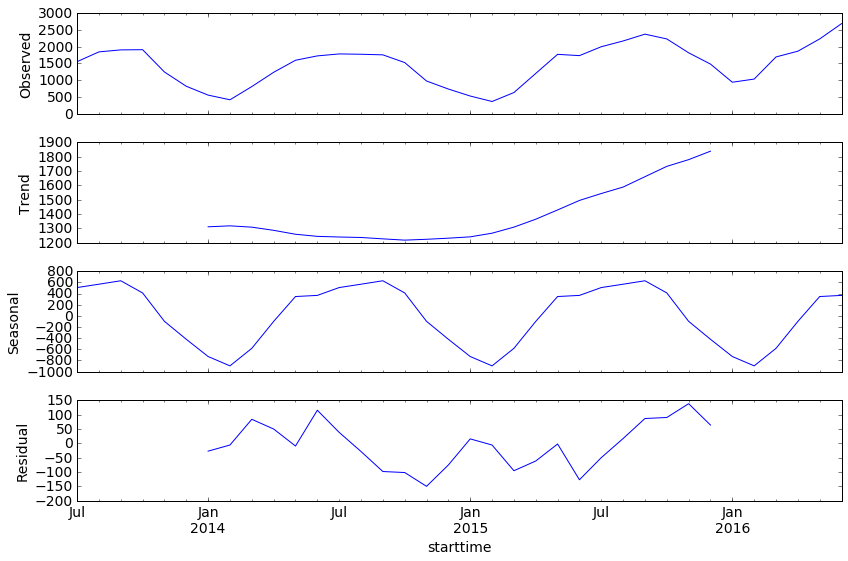

In [11]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

In [ ]:
# my Residual is 150 and Seasonal is 800

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [12]:
station_id=DataFrame.from_csv('Data/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [13]:
import shapely
# combine lat and lon to one column
station_id['lonlat']=zip(station_id.lon,station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [14]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [15]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code

In [16]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['MonthlyAve']=df_bike_monthly.sum()

In [17]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,69308
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,102824
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,273525
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,101949
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,184044


### Add the monthly average rides to the CT shapefile 

In [18]:
# use the 
temp=station_id[['MonthlyAve']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


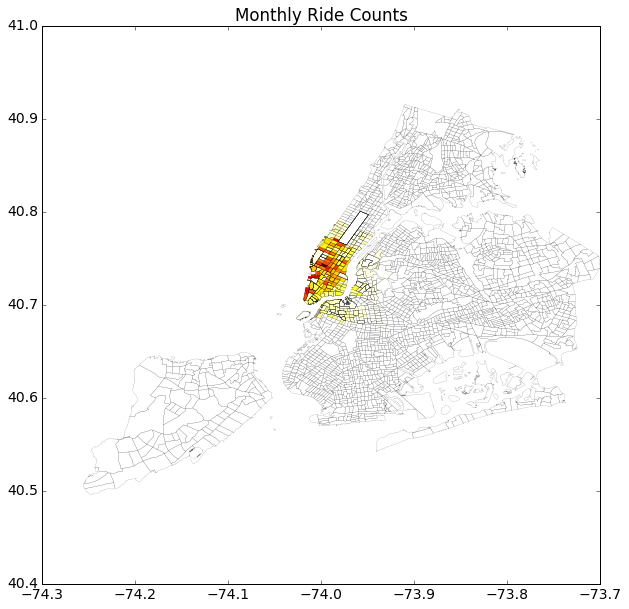

In [19]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts")

### Removing the CTs that are out of zoom boundries

In [20]:
ct_shape_MonthlyAve_Zoom=(ct_shape_MonthlyAve[ct_shape_MonthlyAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [21]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs:", len(temp.MonthlyAve)

Total number of CTs: 2166
Number of zoomed CTs: 543


### Map the monthly rides 

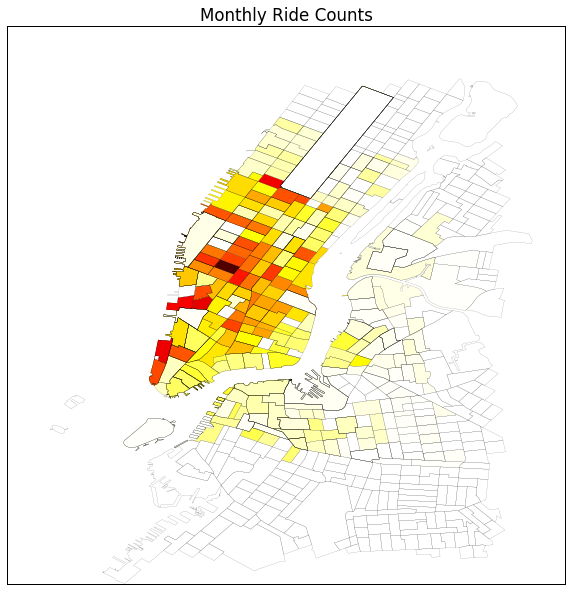

In [22]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts")

### Export Shapefile CTs in the CitiBike Zone

In [22]:
path='Output/ct_shape_MonthlyAve_Zoom.shp'
ct_shape_MonthlyAve_Zoom.to_file(path)

## Exploratory Geospatial Analysis

In [23]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [24]:
qW_CT=ps.queen_from_shapefile(path)

('Island id: ', [0])


#### Neighbors of index10

In [25]:
qW_CT[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [26]:
qW_CT.cardinalities[10]

9

#### Matrix of Weights

In [27]:
Wmatrix, ids = qW_CT.full()

In [28]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [31]:
qW_CT.transform = 'r'

### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [32]:
MonthlyRide=ct_shape_MonthlyAve_Zoom.MonthlyAve
MonthlyRideLag=ps.lag_spatial(qW_CT, MonthlyRide)

#### Create Quantiles for maping

In [33]:
MonthlyRideLagQ10 = ps.Quantiles(MonthlyRideLag, k=10)
MonthlyRideLagQ10

                    Quantiles                    
 
  Lower                Upper                Count
             x[i] <=      0.000               140
     0.000 < x[i] <=    237.571                21
   237.571 < x[i] <=   4167.561                78
  4167.561 < x[i] <=  10026.857                80
 10026.857 < x[i] <=  17493.404                79
 17493.404 < x[i] <=  26977.053                80
 26977.053 < x[i] <=  58126.278                79
 58126.278 < x[i] <=  81788.042                80
 81788.042 < x[i] <=  96870.015                79
 96870.015 < x[i] <= 151983.357                80

#### Map the monthly rides lag

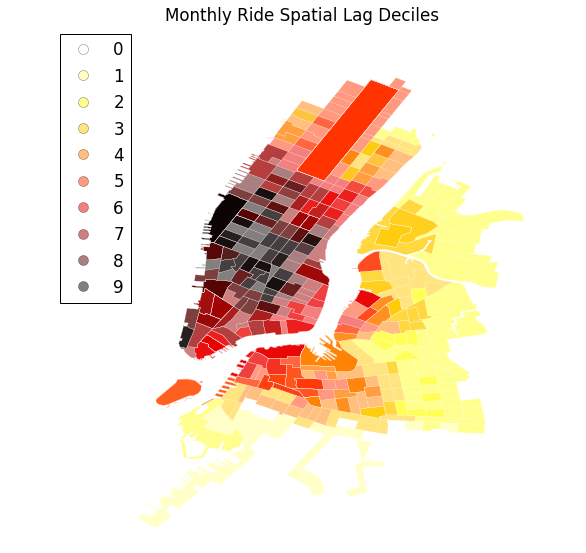

In [34]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles")


## Global  Spatial Autocorrelation

In [35]:
b,a = np.polyfit(MonthlyRide, MonthlyRideLag, 1)
b,a 

(0.65563669282948467, 12557.637062387894)

### Moran Scatterplot

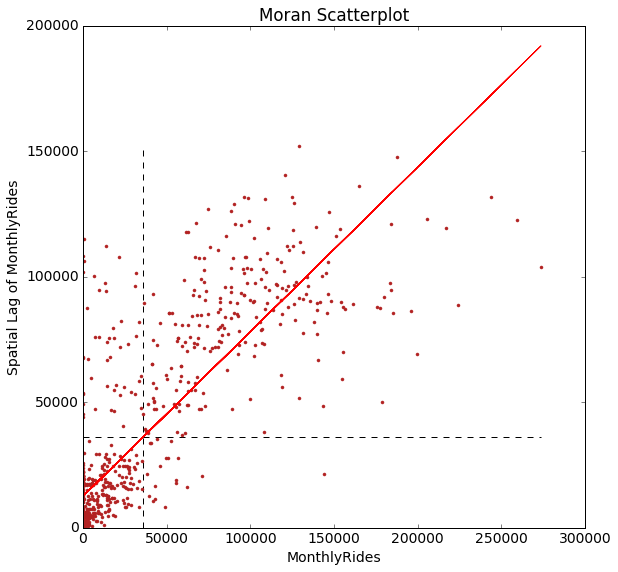

In [36]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide, MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')

### Moran's I

In [37]:
I_MonthlyRide = ps.Moran(MonthlyRide, qW_CT)

In [38]:
I_MonthlyRide.I, I_MonthlyRide.p_sim

(0.65579332908409083, 0.001)

Thus, the $I$ statistic is $0.656$ for this data, and has a very small $p$ value. 

In [39]:
I_MonthlyRide.sim[0:10]

array([-0.00724015, -0.03449907,  0.01733009,  0.00847343,  0.01681233,
       -0.01852776, -0.02301573,  0.03664014, -0.00834536, -0.00510178])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [40]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

(-0.7, 0.7)

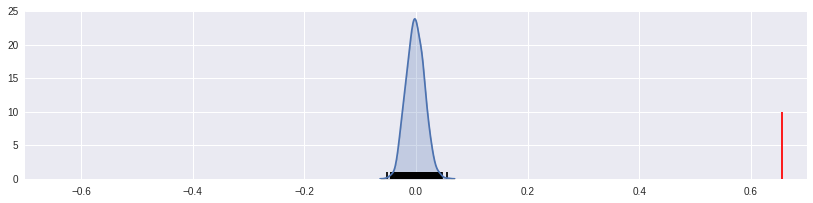

In [41]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

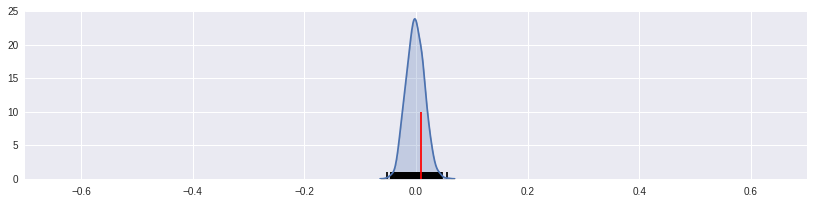

In [42]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

## Local  Spatial Autocorrelation

In [43]:
LMo_MonthlyRide = ps.Moran_Local(MonthlyRide, qW_CT,permutations=999)

In [44]:
LMo_MonthlyRide.Is[0:5], LMo_MonthlyRide.p_sim[0:5]

(array([-0.        , -0.25378156,  0.00285019,  0.00186   ,  0.00802061]),
 array([ 0.001,  0.189,  0.388,  0.412,  0.421]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [45]:
sigs = MonthlyRide[LMo_MonthlyRide.p_sim <= .001]
W_sigs = MonthlyRideLag[LMo_MonthlyRide.p_sim <= .001]
insigs = MonthlyRide[LMo_MonthlyRide.p_sim > .001]
W_insigs = MonthlyRideLag[LMo_MonthlyRide.p_sim > .001]

### Plot Signficant LISA

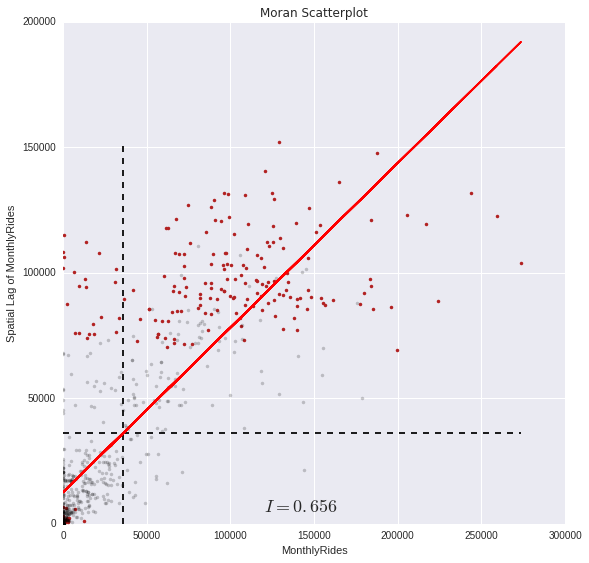

In [46]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')


### Hot and Cold spots 

In [47]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 192
Number of Coldspots: 235


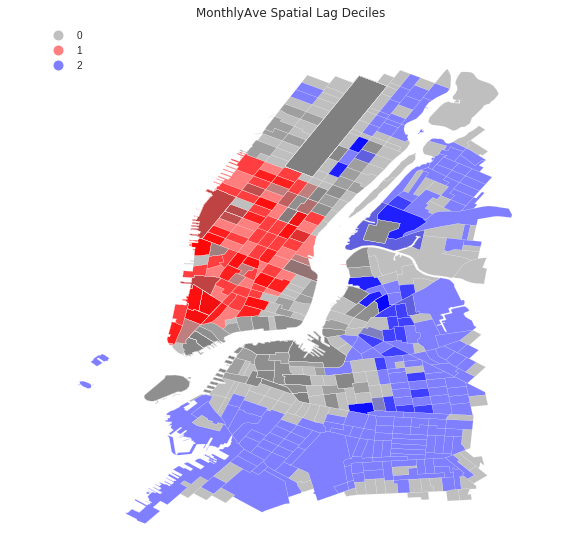

In [48]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles")